In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
from IPython.display import display
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
plt.style.use('ggplot')

from math import sqrt

In [2]:
data = pd.read_csv('basketballdata.csv')
display(data.head(5))

,TEAM,GP,Win_pct,PD,PF,PA,FG_pct,OFG_pct,3PM,3PA,3P_pct,O3PM,O3PA,O3P_pct,AST_TO,OREB_pct,DREB_Pct,PACE
0,Golden State,9,0.667,8.3,120.0,111.7,0.523,0.446,13.4,32.9,0.409,11.3,30.7,0.370,1.79,0.251,0.733,103.33
1,Brooklyn,9,0.333,-5.0,114.3,119.3,0.436,0.474,11.2,33.0,0.340,10.3,26.9,0.384,1.40,0.219,0.766,109.26
2,Washington,8,0.500,2.6,113.5,110.9,0.461,0.477,10.0,27.5,0.364,9.6,27.8,0.347,1.65,0.247,0.759,103.22
3,Indiana,9,0.556,2.1,111.3,109.2,0.481,0.475,9.6,25.2,0.379,10.0,27.0,0.370,1.58,0.232,0.761,103.36
4,Orlando,9,0.667,4.7,111.3,106.6,0.480,0.447,12.4,29.6,0.421,8.4,27.6,0.306,1.53,0.188,0.754,104.66


In [3]:
pred = data[['TEAM', 'PD','Win_pct']].copy()
display(pred.head(5))

,TEAM,PD,Win_pct
0,Golden State,8.3,0.667
1,Brooklyn,-5.0,0.333
2,Washington,2.6,0.500
3,Indiana,2.1,0.556
4,Orlando,4.7,0.667


In [4]:
names = ['X', 'Y', 'XY', 'X^2', 'Y^2', 'N']
values = [np.sum(pred['PD']), np.sum(pred['Win_pct']), np.sum(pred['PD'] * pred['Win_pct']), np.sum(pred['PD']**2), np.sum(pred['Win_pct']**2), len(pred)]

pd.DataFrame(values, names)

,0
X,1.30000
Y,15.01000
XY,25.66280
X^2,1039.75000
Y^2,8.38251
N,30.00000


In [5]:
def linear_regression(x, y):
    x_sum = np.sum(x)
    y_sum = np.sum(y)
    xy_sum = np.sum(x*y)

    x2_sum = np.sum(x**2)
    y2_sum = np.sum(y**2)

    n = len(x)
    assert n == len(y)

    x_avg = np.mean(x)
    y_avg = np.mean(y)
    
    m = (n*xy_sum - x_sum*y_sum) / (n*x2_sum - x_sum**2)
    b = y_avg - m * x_avg

    print("y =",m,"x +",b)
    
    r = (n*xy_sum - x_sum*y_sum) / sqrt((n*x2_sum - (x_sum**2))*(n*y2_sum - y_sum**2))
    r2 = r**2
    
    print("R: ", r, "\n R^2: ", r2)
    
    return (m*x + b), r, r2

y, r, r2 = linear_regression(pred['PD'], pred['Win_pct'])

y = 0.0240574387135185 x + 0.4992908443224143
R:  0.8304580711499571 
 R^2:  0.6896606079381071


# A BUNCH OF MARKDOWN HERE

<hr/>
<hr/>
<hr/>

In [6]:
x = pred['PD'][0]
y = pred['Win_pct'][0]

weight = 0.5

hypothesis = x * weight
error = (hypothesis - y) ** 2
print(error)

12.131289


In [7]:
weight = 1

hypothesis = x * weight
error = (hypothesis - y) ** 2
print(error)

58.262689


All numbers in [0.0, 0.05, 0.1, 0.15, 0.2]

In [8]:
x = pred['PD'][0]
y = pred['Win_pct'][0]

def predict(x, weight):
    return x*weight

for i in range(0, 5):
    weight = i/20
    hypothesis = predict(x, weight)
    error = (hypothesis - y) ** 2
    print(i)
    print("Weight: ", str(weight), "\n", "Error: ",str(error))

0
Weight:  0.0 
 Error:  0.444889
1
Weight:  0.05 
 Error:  0.063504
2
Weight:  0.1 
 Error:  0.026569
3
Weight:  0.15 
 Error:  0.334084
4
Weight:  0.2 
 Error:  0.986049


Let's try it a bunch of times

In [9]:
for i in range(0, 5):
    weight = i/20
    hypothesis = predict(x, weight)
    error = (hypothesis - y) ** 2
    print(i)
    print("Weight: ", str(weight), "\n", "Error: ",str(error))

0
Weight:  0.0 
 Error:  0.444889
1
Weight:  0.05 
 Error:  0.063504
2
Weight:  0.1 
 Error:  0.026569
3
Weight:  0.15 
 Error:  0.334084
4
Weight:  0.2 
 Error:  0.986049


Explain convergence, alpha

In [10]:
def basic_gradient_descent(x, y):
    weight = 0.5
    alpha = 0.05
    
    for i in range(0, 10):
        hypothesis = predict(x, weight)
        error = (hypothesis - y) ** 2
        weight -= alpha*(hypothesis-y)
        print(i)
        print("Weight: ", str(weight), "\n", "Error: ",str(error))
        
basic_gradient_descent(x, y)

0
Weight:  0.32585 
 Error:  12.131289
1
Weight:  0.22397225 
 Error:  4.15163037803
2
Weight:  0.16437376625 
 Error:  1.42079170612
3
Weight:  0.129508653256 
 Error:  0.486230441627
4
Weight:  0.109112562155 
 Error:  0.166400212886
5
Weight:  0.0971808488606 
 Error:  0.0569463128548
6
Weight:  0.0902007965835 
 Error:  0.0194884519167
7
Weight:  0.0861174660013 
 Error:  0.00666943545721
8
Weight:  0.0837287176108 
 Error:  0.00228244754934
9
Weight:  0.0823312998023 
 Error:  0.000781110612574


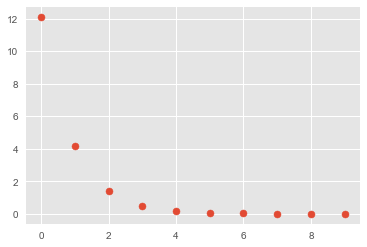

In [11]:
def basic_gradient_descent(x, y, iterations=10):
    weight = 0.5
    alpha = 0.05
    
    history = np.empty(2)
    for i in range(iterations):
        hypothesis = predict(x, weight)
        error = (hypothesis - y) ** 2
        
        history = np.vstack([history,[i, error]])
        weight -= alpha*(hypothesis-y)
        
    return history[1:]
        
history = basic_gradient_descent(x, y)

plt.scatter(history[:,0], history[:,1])

This might be a good place to explain why you don't just iterate a million times

Adding in the intercept

y = -0.28415 x  + 0.71585
y = -0.16867025 x  + 0.83132975
y = -0.10688858375 x  + 0.89311141625
y = -0.0738353923062 x  + 0.926164607694
y = -0.0561519348838 x  + 0.943848065116
y = -0.0466912851629 x  + 0.953308714837
y = -0.0416298375621 x  + 0.958370162438
y = -0.0389219630957 x  + 0.961078036904
y = -0.0374732502562 x  + 0.962526749744
y = -0.0366981888871 x  + 0.963301811113


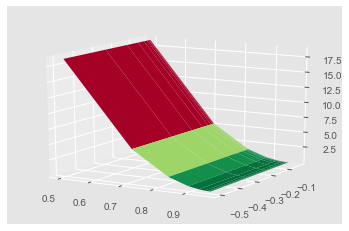

In [12]:
def basic_gradient_descent(x, y, iterations=10):
    x = [1, x]
    weights = [0.5, -0.5]
    alpha = 0.05
    
    weight_history = np.empty(2)
    error_history = []
    for i in range(iterations):
        hypothesis = np.sum(np.dot(x, weights))
        error = (hypothesis - y) ** 2
        
        error_history.append(error)
        weight_history = np.vstack([weight_history, weights])
        
        for i in range(len(weights)):
            weights[i] -= alpha*(hypothesis-y) 
            
        print("y =", str(weights[1]),"x", " +", str(weights[0]))
    return weights, weight_history[1:], error_history
        
weights, weight_history, error_history = basic_gradient_descent(x, y, iterations=10)

def plot_error(weight_history, error_history, elev=15, azim=300):
    plotx, ploty = np.meshgrid(weight_history[:,0], weight_history[:,1])

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.plot_surface(plotx, ploty, error_history, cmap='RdYlGn_r')
    ax.view_init(elev=elev, azim=azim)
    
plot_error(weight_history, error_history)

Plot y=mx + b changes here

In [13]:
x = 

SyntaxError: invalid syntax (<ipython-input-13-2ec917a9f03c>, line 1)

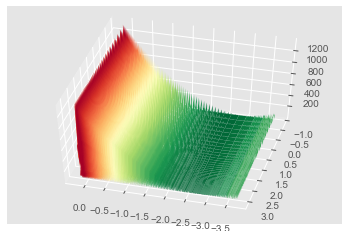

In [14]:
def basic_gradient_descent(x, y, iterations=10):
    x = [[1, i] for i in x]
    weights = [-3.7, -0.85] #(np.random.sample(2)+np.random.randint(-20,20,2)).tolist()
    alpha = 0.001
    
    weight_history = np.empty(2)
    error_history = []
    for i in range(iterations):
        for j in range(len(x)):
            hypothesis = np.sum(np.dot(x[j], weights))
            error = (hypothesis - y[j]) ** 2

            error_history.append(error)
            weight_history = np.vstack([weight_history, weights])

            for k in range(len(weights)):
                weights[k] -= alpha*(hypothesis-y[j]) 
            #print("y =", str(weights[1]),"x", " +", str(weights[0]))
    return weights, weight_history[1:], error_history
        
weights, weight_history, error_history = basic_gradient_descent(pred['PD'], pred['Win_pct'], iterations=100)
#print(error_history)
plot_error(weight_history, error_history, elev=50, azim=105)

In [17]:
def compute_hypothesis(x, weights):
    return np.sum(np.dot(x, weights))

def compute_error(hypothesis, y):
    return (hypothesis-y)**2

def update_weights(weights, alpha, hypothesis, y):
    for i in range(len(weights)):
        weights[i] -= alpha*(hypothesis-y)
    return weights

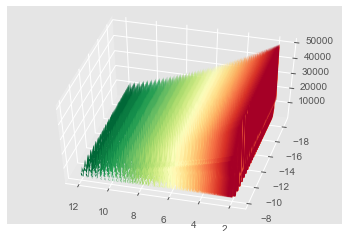

In [20]:
def gradient_descent(x, y, weights, alpha=0.001, iterations=100):
    x = [[1, i] for i in x]
    
    weight_history = np.empty(2)
    error_history = []
    for i in range(iterations):
        for j in range(len(x)):
            hypothesis = np.sum(np.dot(x[j], weights))
            error_history.append(compute_error(hypothesis, y[j]))
            weights = update_weights(weights, alpha, hypothesis, y[j])
            weight_history = np.vstack([weight_history, weights])
    weight_history = weight_history[1:]
    plot_error(weight_history, error_history, elev=50, azim=105)
    return weights, weight_history, error_history
        
random_weights = (np.random.sample(2)+np.random.randint(-10,10,2)).tolist()
weights, weight_history, error_history = gradient_descent(pred['PD'], pred['Win_pct'], random_weights, iterations=100)